In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy as cp
import random
import json 
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [10]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [11]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [12]:
samplecity

,city,country
1667,penalva,br
3591,mirzapur,bd
5616,manosque,fr
4458,yima,cn
2017,tulua,co
543,corpus christi,py
2673,koutiala,ml
4721,lamar,us
4383,portales,us
1265,laje,br


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()

        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")
    

No data for this city: penalva
This is city#: 1
This is: penalva
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=penalva
No data for this city: mirzapur
This is city#: 2
This is: mirzapur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=mirzapur
No data for this city: manosque
This is city#: 3
This is: manosque
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=manosque
No data for this city: yima
This is city#: 4
This is: yima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=yima
No data for this city: tulua
This is city#: 5
This is: tulua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=

No data for this city: dogondoutchi
This is city#: 353
This is: dogondoutchi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=dogondoutchi
No data for this city: la baneza
This is city#: 354
This is: la baneza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=la baneza
No data for this city: krasnystaw
This is city#: 355
This is: krasnystaw
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=krasnystaw
No data for this city: paucartambo
This is city#: 356
This is: paucartambo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=paucartambo
No data for this city: tucano
This is city#: 357
This is: tucano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

In [21]:
#samplecity = samplecity[samplecity.latitude != ""]
#samplecity

#samplecity = samplecity[samplecity.latitude != ""]
samplecity.head()


,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed


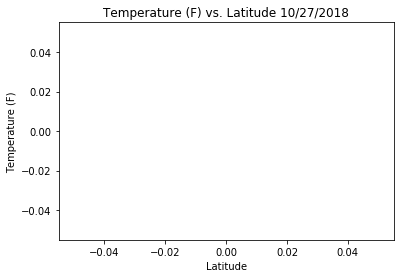

In [15]:
# import datetime
# date = datetime.date.today()
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

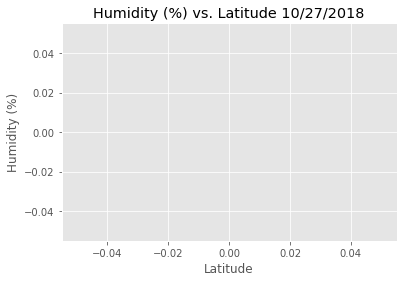

In [16]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

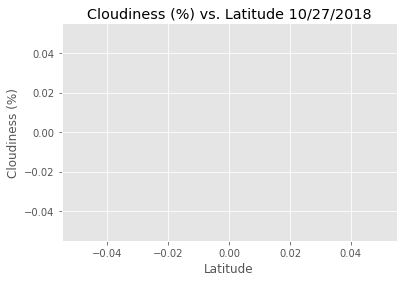

In [17]:

# plt.scatter(latitude,cloudy)# plt.sc 
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

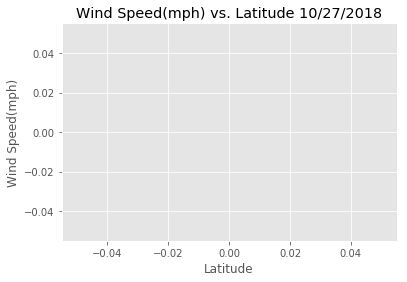

In [18]:

# plt.scatter(latitude,windspeed)# plt.sc 
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [22]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
